In [54]:
#importing all the tools 

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("/content/drive/MyDrive/tradingBot/Data/DATA_MATIC_15m.csv",date_parser = True)
del df["index"]
df.tail()

,open,high,low,volume,close,time
995,124.200,124.238,124.000,33,124.000,1646124300000
996,124.238,124.373,124.000,40,124.000,1646122500000
997,124.000,124.373,124.000,858,124.373,1646121600000
998,124.000,124.000,124.000,108,124.000,1646120700000
999,123.454,123.950,123.454,18,123.950,1646119800000


In [56]:
#splitting the data into training and testing sets
df_train = df[:800]
df_test  = df[800:]
df_train.head() , len(df_train)

(      open     high      low  volume    close           time
 0  112.999  113.254  112.998     599  113.254  1647513000000
 1  112.968  113.072  112.967    1465  113.072  1647512100000
 2  112.715  112.715  112.600     448  112.600  1647511200000
 3  113.584  113.584  113.584      84  113.584  1647510300000
 4  113.581  113.584  113.581     100  113.584  1647508500000, 800)

In [57]:
df_test.head() , len(df_test)

(        open     high      low  volume    close           time
 800  121.862  121.862  121.862     562  121.862  1646388900000
 801  121.648  121.648  121.648     504  121.648  1646387100000
 802  121.650  121.650  121.400     647  121.400  1646385300000
 803  121.000  121.056  120.050    8477  120.100  1646382600000
 804  123.000  123.000  122.300     413  122.300  1646381700000, 200)

In [58]:
df_train.drop(["time"] , axis= 1)
df_test.drop(["time"] , axis = 1)
#time drop

,open,high,low,volume,close
800,121.862,121.862,121.862,562,121.862
801,121.648,121.648,121.648,504,121.648
802,121.650,121.650,121.400,647,121.400
803,121.000,121.056,120.050,8477,120.100
804,123.000,123.000,122.300,413,122.300
...,...,...,...,...,...
995,124.200,124.238,124.000,33,124.000
996,124.238,124.373,124.000,40,124.000
997,124.000,124.373,124.000,858,124.373
998,124.000,124.000,124.000,108,124.000


#normalizing the data for the model to train 


In [59]:
scalar = MinMaxScaler()
training_data = scalar.fit_transform(df_train)
training_data

array([[4.03450292e-01, 4.18362573e-01, 4.06860465e-01, 9.63428387e-02,
        4.21744186e-01, 1.00000000e+00],
       [4.01637427e-01, 4.07719298e-01, 4.05058140e-01, 2.35862736e-01,
        4.11162791e-01, 9.99196141e-01],
       [3.86842105e-01, 3.86842105e-01, 3.83720930e-01, 7.20154664e-02,
        3.83720930e-01, 9.98392283e-01],
       ...,
       [9.56257310e-01, 9.56257310e-01, 9.30232558e-01, 1.37908813e-01,
        9.30232558e-01, 2.41157556e-03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.49492508e-02,
        1.00000000e+00, 8.03858521e-04],
       [9.56198830e-01, 9.56257310e-01, 9.56453488e-01, 2.41662639e-03,
        9.56511628e-01, 0.00000000e+00]])

In [60]:
x_train = []
y_train = []

training_data.shape[0]
print(training_data[20 : 80] , training_data.shape)

[[3.85730994e-01 4.01461988e-01 3.89302326e-01 9.92427904e-02
  4.04360465e-01 9.78295820e-01]
 [3.96666667e-01 4.03508772e-01 4.00174419e-01 5.79990333e-02
  4.06976744e-01 9.77491961e-01]
 [3.94269006e-01 3.94269006e-01 3.97558140e-01 9.48928629e-02
  3.97558140e-01 9.74276527e-01]
 [4.03508772e-01 4.03508772e-01 4.06976744e-01 1.68680522e-01
  4.06976744e-01 9.73472669e-01]
 [4.26432749e-01 4.26432749e-01 4.29767442e-01 1.51441920e-02
  4.29767442e-01 9.72668810e-01]
 [4.36900585e-01 4.36959064e-01 4.29767442e-01 1.12614790e-01
  4.29767442e-01 9.71864952e-01]
 [4.03508772e-01 4.03508772e-01 4.06976744e-01 6.12212019e-03
  4.06976744e-01 9.71061093e-01]
 [4.40000000e-01 4.48654971e-01 4.40232558e-01 2.68889963e-01
  4.40232558e-01 9.67845659e-01]
 [4.58304094e-01 4.58304094e-01 4.61453488e-01 2.64217819e-02
  4.61453488e-01 9.67041801e-01]
 [4.63157895e-01 4.91228070e-01 4.61453488e-01 1.29208958e-01
  4.61453488e-01 9.66237942e-01]
 [4.14736842e-01 4.61988304e-01 4.18139535e-01 1.9

In [61]:
for i in range(60, training_data.shape[0]):
  x_train.append(training_data[i - 60 : i])
  y_train.append(training_data[i ,0 ])

#x_train , y_train

In [62]:
x_train , y_train = np.array(x_train) ,  np.array(y_train)
x_train.shape

(740, 60, 6)

#Making the LSTM model

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout


###initialinzing the RNN model


In [64]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 6)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            11400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [65]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mean_squared_error')

In [66]:
x_train.shape

(740, 60, 6)

Epoch 1/50
14/14 [==============================] - 9s 280ms/step - loss: 0.0933 - val_loss: 0.1563
Epoch 2/50
14/14 [==============================] - 3s 229ms/step - loss: 0.0253 - val_loss: 0.0476
Epoch 3/50
14/14 [==============================] - 3s 228ms/step - loss: 0.0170 - val_loss: 0.0302
Epoch 4/50
14/14 [==============================] - 3s 230ms/step - loss: 0.0169 - val_loss: 0.0227
Epoch 5/50
14/14 [==============================] - 3s 233ms/step - loss: 0.0133 - val_loss: 0.0174
Epoch 6/50
14/14 [==============================] - 3s 228ms/step - loss: 0.0133 - val_loss: 0.0161
Epoch 7/50
14/14 [==============================] - 3s 228ms/step - loss: 0.0146 - val_loss: 0.0382
Epoch 8/50
14/14 [==============================] - 3s 230ms/step - loss: 0.0136 - val_loss: 0.0296
Epoch 9/50
14/14 [==============================] - 3s 227ms/step - loss: 0.0140 - val_loss: 0.0263
Epoch 10/50
14/14 [==============================] - 3s 227ms/step - loss: 0.0131 - val_loss: 0.0165

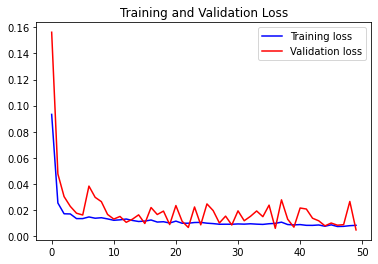

In [67]:
history= model.fit(x_train, y_train, epochs = 50, batch_size =50, validation_split=0.1)  
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

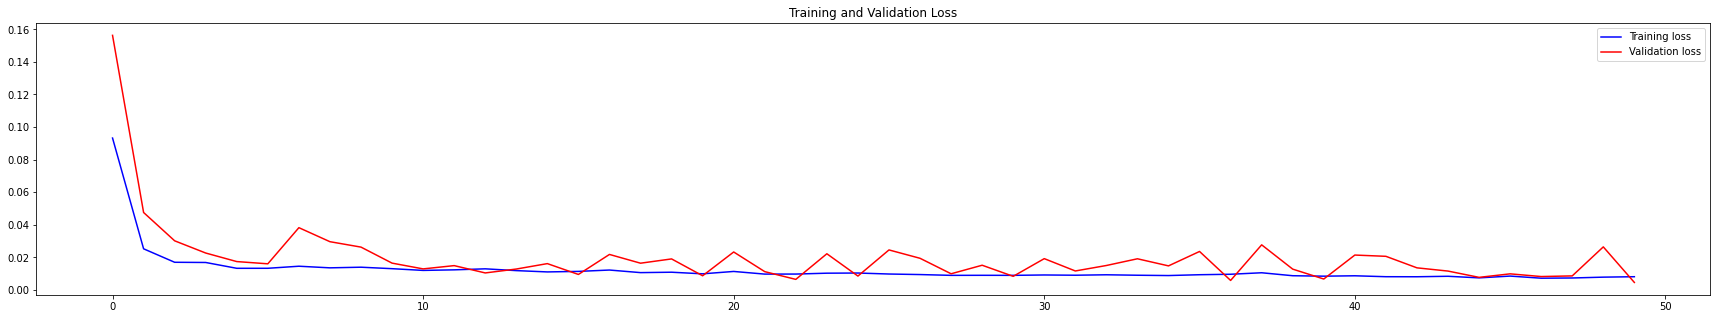

In [68]:



plt.figure(figsize = (30, 5))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [69]:
part_60_days = df_train.tail(60)
df= part_60_days.append(df_test, ignore_index = True)
df.head()

,open,high,low,volume,close,time
0,120.962,120.962,120.489,167,120.489,1646470800000
1,120.000,120.000,120.000,1,120.000,1646469900000
2,118.600,120.636,118.600,207,120.636,1646469000000
3,119.055,119.055,118.600,977,118.600,1646468100000
4,119.010,119.055,119.010,291,119.055,1646467200000


In [70]:
df
del df["time"] #time coloumn
df.head()

,open,high,low,volume,close
0,120.962,120.962,120.489,167,120.489
1,120.000,120.000,120.000,1,120.000
2,118.600,120.636,118.600,207,120.636
3,119.055,119.055,118.600,977,118.600
4,119.010,119.055,119.010,291,119.055


In [71]:
inputs = scalar.fit_transform(df_test) 
inputs

array([[0.12516196, 0.12189787, 0.16927273, 0.06618688, 0.15647059,
        1.        ],
       [0.10667703, 0.10389501, 0.14981818, 0.05934403, 0.13848739,
        0.99331104],
       [0.10684979, 0.10406326, 0.12727273, 0.0762152 , 0.11764706,
        0.98662207],
       ...,
       [0.30983847, 0.33313704, 0.36363636, 0.10110901, 0.36747899,
        0.00668896],
       [0.30983847, 0.30175822, 0.36363636, 0.01262388, 0.33613445,
        0.00334448],
       [0.262676  , 0.29755195, 0.314     , 0.00200566, 0.33193277,
        0.        ]])

In [72]:
x_test = []
y_test = []


inputs.shape[0]
print(inputs[20 : 80] , inputs.shape)

[[5.88235294e-02 7.24320686e-02 0.00000000e+00 2.92826805e-01
  0.00000000e+00 8.76254181e-01]
 [1.80271227e-01 5.95103895e-01 9.02727273e-02 2.66635205e-01
  8.34453782e-02 8.72909699e-01]
 [4.10900924e-01 4.37284428e-01 4.70000000e-01 6.15856536e-02
  4.71512605e-01 8.42809365e-01]
 [4.17811177e-01 4.06915117e-01 4.77272727e-01 6.46531383e-02
  4.41176471e-01 8.39464883e-01]
 [2.20350695e-01 2.14604189e-01 2.69454545e-01 3.53940538e-04
  2.49075630e-01 8.19397993e-01]
 [2.66649391e-01 2.59695466e-01 3.18181818e-01 1.17980179e-04
  2.94117647e-01 8.16053512e-01]
 [2.51274078e-01 2.44721124e-01 3.02000000e-01 2.35960359e-03
  2.79159664e-01 8.09364548e-01]
 [2.83925024e-01 2.76604694e-01 3.36363636e-01 3.30344502e-03
  3.10924370e-01 8.06020067e-01]
 [5.67072644e-01 5.52284008e-01 6.34363636e-01 1.17980179e-04
  5.86386555e-01 8.02675585e-01]
 [2.83925024e-01 2.76520569e-01 3.36363636e-01 2.10004719e-02
  3.10924370e-01 7.95986622e-01]
 [3.09838473e-01 3.01758223e-01 3.18181818e-01 2.8

In [73]:
for i in range(60, inputs.shape[0]):
  x_test.append(inputs[i - 60 : i])
  y_test.append(inputs[i ,0 ])
  #appending inputs

In [74]:
x_test , y_test = np.array(x_test) ,  np.array(y_test)

In [75]:
y_pred = model.predict(x_test) 
y_pred.shape, y_test.shape

((140, 1), (140,))

In [76]:
scalar.scale_

array([8.63781636e-02, 8.41255153e-02, 9.09090909e-02, 1.17980179e-04,
       8.40336134e-02, 3.71609067e-09])

In [77]:
scale = 1/5.18164146e-05

In [78]:
y_test = y_test*scale 
y_pred = y_pred*scale

In [79]:
y_pred

array([[ 9644.058 ],
       [ 9806.603 ],
       [ 9944.736 ],
       [10013.288 ],
       [ 9976.992 ],
       [ 9850.625 ],
       [ 9692.807 ],
       [ 9560.43  ],
       [ 9485.369 ],
       [ 9452.588 ],
       [ 9464.962 ],
       [ 9512.129 ],
       [ 9591.358 ],
       [ 9724.785 ],
       [ 9911.981 ],
       [10152.333 ],
       [10426.474 ],
       [10738.281 ],
       [11112.356 ],
       [11556.114 ],
       [12001.758 ],
       [12395.623 ],
       [12698.921 ],
       [12981.177 ],
       [13213.449 ],
       [13397.627 ],
       [13536.372 ],
       [13584.225 ],
       [13523.777 ],
       [13416.973 ],
       [13285.534 ],
       [13183.385 ],
       [13151.406 ],
       [13203.6455],
       [13317.978 ],
       [13463.17  ],
       [13623.032 ],
       [13756.577 ],
       [13891.721 ],
       [14070.562 ],
       [14257.091 ],
       [14299.201 ],
       [14121.768 ],
       [13728.744 ],
       [13193.284 ],
       [12650.373 ],
       [12256.639 ],
       [12125

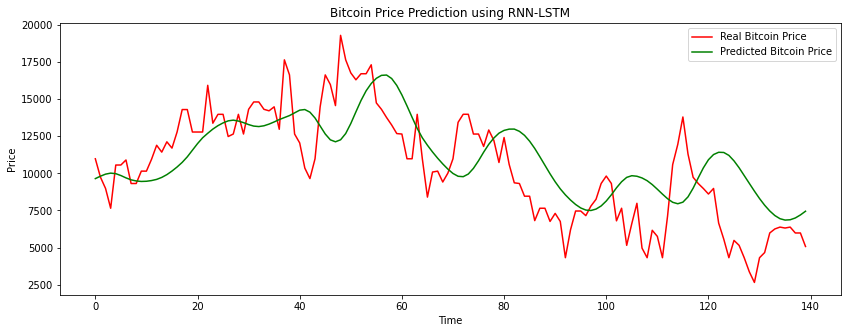

In [80]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [81]:
y_pred

array([[ 9644.058 ],
       [ 9806.603 ],
       [ 9944.736 ],
       [10013.288 ],
       [ 9976.992 ],
       [ 9850.625 ],
       [ 9692.807 ],
       [ 9560.43  ],
       [ 9485.369 ],
       [ 9452.588 ],
       [ 9464.962 ],
       [ 9512.129 ],
       [ 9591.358 ],
       [ 9724.785 ],
       [ 9911.981 ],
       [10152.333 ],
       [10426.474 ],
       [10738.281 ],
       [11112.356 ],
       [11556.114 ],
       [12001.758 ],
       [12395.623 ],
       [12698.921 ],
       [12981.177 ],
       [13213.449 ],
       [13397.627 ],
       [13536.372 ],
       [13584.225 ],
       [13523.777 ],
       [13416.973 ],
       [13285.534 ],
       [13183.385 ],
       [13151.406 ],
       [13203.6455],
       [13317.978 ],
       [13463.17  ],
       [13623.032 ],
       [13756.577 ],
       [13891.721 ],
       [14070.562 ],
       [14257.091 ],
       [14299.201 ],
       [14121.768 ],
       [13728.744 ],
       [13193.284 ],
       [12650.373 ],
       [12256.639 ],
       [12125

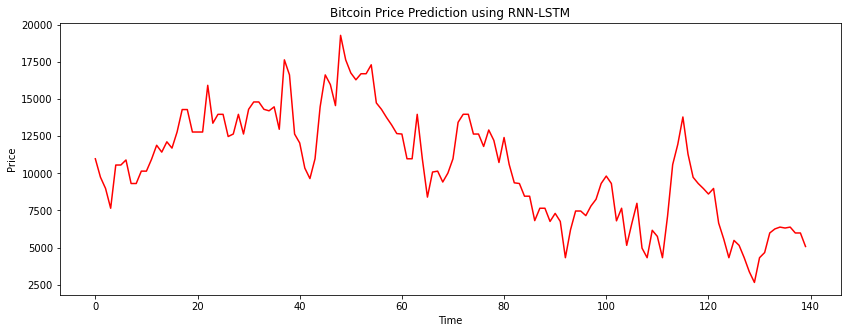

In [84]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred[-10 , 0: 10], color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()